# Task 2 1

In [21]:
import pandas as pd
df = pd.read_csv("merged_dataset.csv")

In [22]:
df = df.loc[:, (df != 0).any(axis=0)]

In [23]:
data = df[df.columns[6:7]]

In [24]:
len(df.columns[6:42])

36

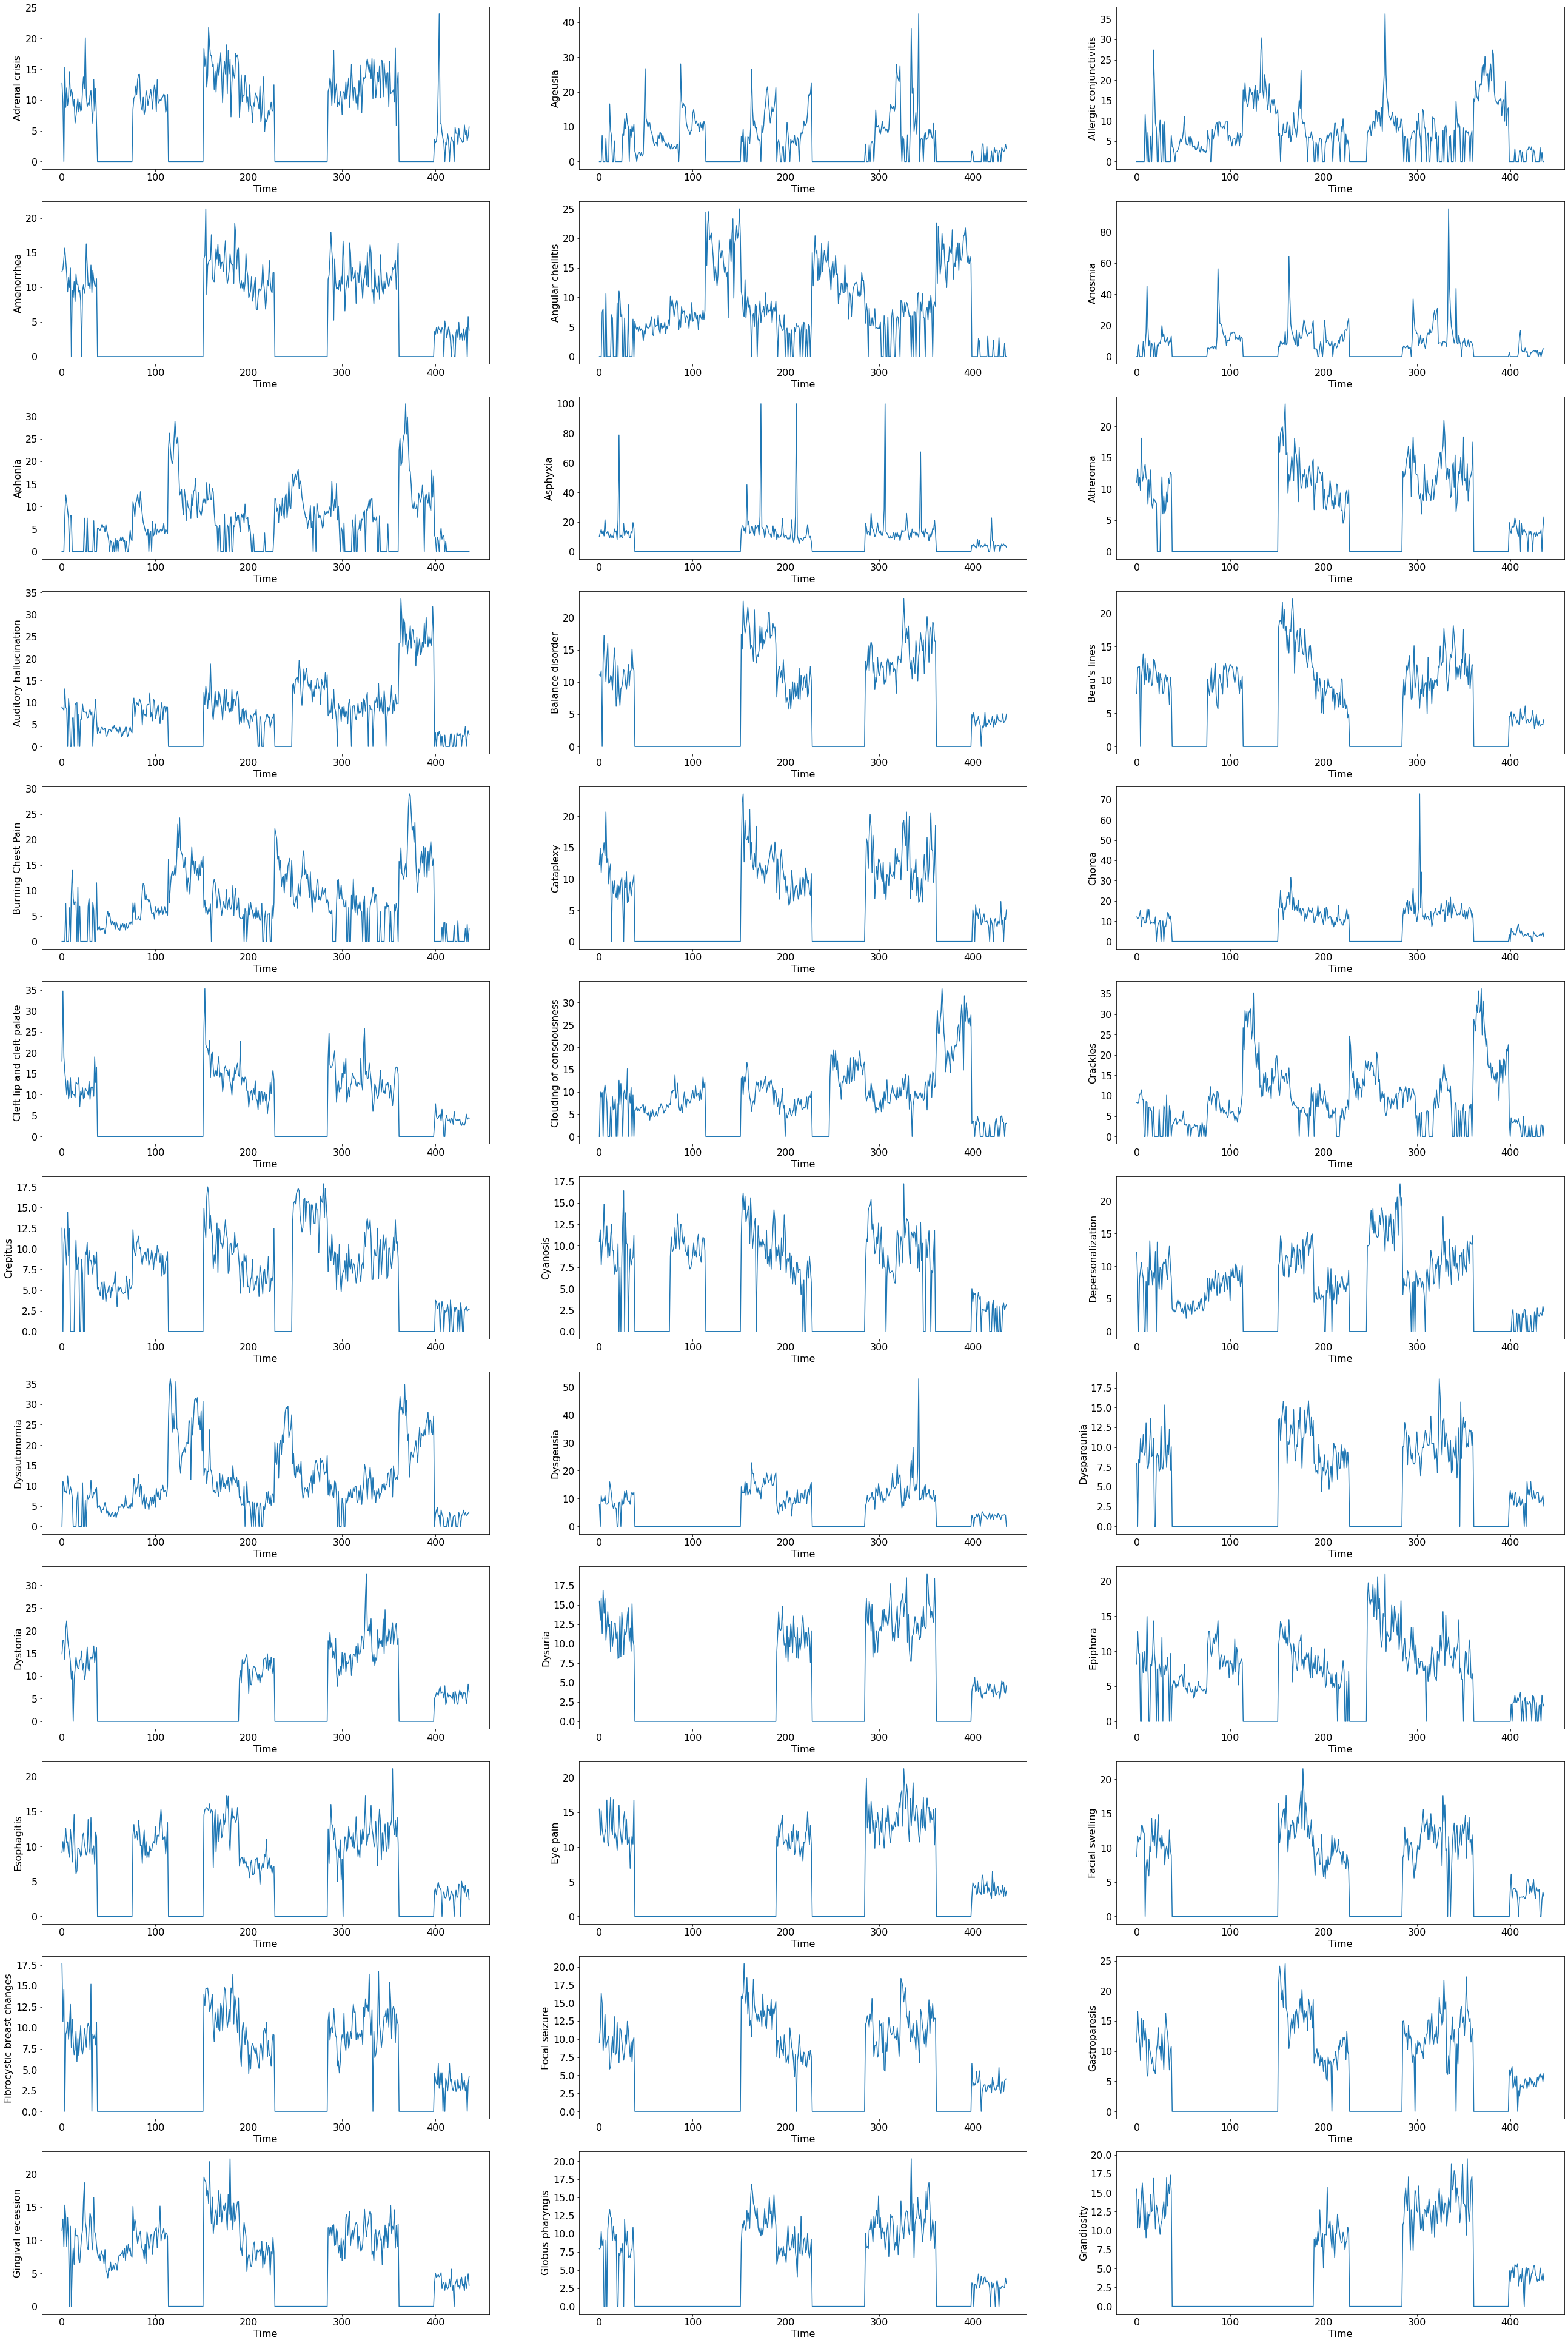

In [25]:
##distributions over time for 36 symptons
import matplotlib.pyplot as plt
plt.figure(figsize=(45,70))

for i in range(12):
    for j in range(3):
        plt.subplot2grid((12,3), (i, j))
        plt.plot(df[df.columns[6+3*i+j:6+3*i+j+1]])
        plt.ylabel(df.columns[6+3*i+j:6+3*i+j+1][0][8:],size=16)
        plt.xlabel('Time',size=16)
        plt.xticks(size=16)
        plt.yticks(size=16)
plt.show()

In [28]:
import plotly.graph_objects as go 
import pandas as pd 

In [29]:
region = df['open_covid_region_code']

In [30]:
region_drop = region.drop_duplicates()

In [31]:
import numpy as np
region_drop_ = []
for i in range(len(region_drop)):
    a = str(np.array(region_drop)[i])
    region_drop_.append(a[3:])

In [32]:
len(region_drop_)

12

In [33]:
## plot the map for the symptom Adrenal Crisis (col 6)with the sum of the intensity over January to September
# for i in range(3):
region_num = []
for k in range(len(region_drop_)):
    region_num.append(0)

for k in range(len(region_drop_)):
    for j in range(len(df[df.columns[6:6+1]])): # col 6:the symptom Adrenal Crisis 
        a = np.array(df)[j][1]
        b = np.array(df)[j][6]
        if region_drop_[k] == a[3:]:
            region_num[k] = region_num[k] + b
#     print(region_num)

num = region_num
fig = go.Figure(data=go.Choropleth( 
locations=region_drop_, # region code
z = num,
locationmode = 'USA-states', # country
colorscale = 'Reds', # color scale
colorbar_title = 'Intensity', # color bar 
)) 

fig.update_layout( 
    title_text = str(df.columns[6:6+1][0]), # titles of the map ; col 6:the symptom Adrenal Crisis 
    geo_scope='usa', # set scope
    #scope : "world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
) 

In [34]:
## Example for Symptom Ageusia:col7
# for i in range(3):
region_num = []
for k in range(len(region_drop_)):
    region_num.append(0)

for k in range(len(region_drop_)):
    for j in range(len(df[df.columns[6+1:6+2]])):
        a = np.array(df)[j][1]
        b = np.array(df)[j][6+1]
        if region_drop_[k] == a[3:]:
            region_num[k] = region_num[k] + b
#     print(region_num)

num = region_num
fig = go.Figure(data=go.Choropleth( 
locations=region_drop_, 
z = num, 
locationmode = 'USA-states',
colorscale = 'Reds',
colorbar_title = 'Intensity', 
)) 

fig.update_layout( 
    title_text = str(df.columns[6+1:6+2][0]), 
    geo_scope='usa', 
) 

# Task 2 2

In [43]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=91)
pca_data = estimator.fit_transform(df.iloc[:,6:])

In [44]:
pca_data.shape

(437, 91)

In [45]:
pca_data

array([[-46.52082775,   7.29238227,  -3.63199107, ...,  -1.5102798 ,
          1.50660487,   0.18120301],
       [-48.07263796,   7.22148005,   0.26432214, ...,  -0.23062845,
         -0.43437114,  -1.20330215],
       [-51.9601146 ,   9.66377267,   7.42415702, ...,  -0.64251645,
         -0.77189734,   0.70893017],
       ...,
       [  3.896602  ,  -8.96985209, -36.79311024, ...,   1.00106679,
          0.36490221,  -0.40701057],
       [  3.53804128,  -2.0134015 , -36.01693164, ...,  -0.54417902,
          1.40459723,  -1.15021104],
       [  7.02812448,   0.52171405, -34.74795304, ...,   0.17565565,
         -0.62526771,   1.07462589]])

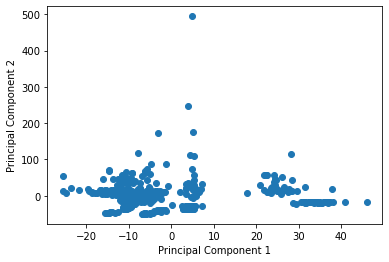

In [46]:
plt.scatter(pca_data[:,3:4], pca_data[:,1:2])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Task 2 3

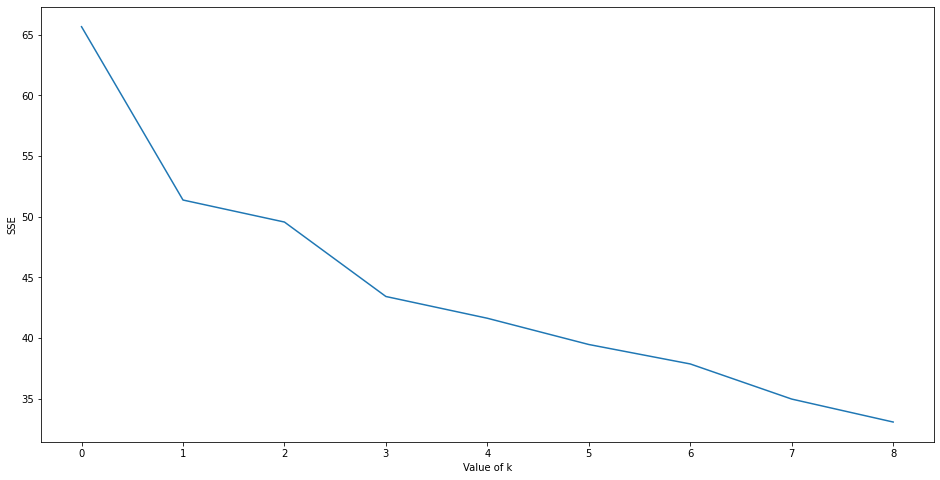

In [54]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
a=[]
for k in range(1,10):
    model = KMeans(n_clusters=k, init='k-means++', n_init=5)
    model.fit(df.iloc[:,6:])
    value = sum(np.min(cdist(df.iloc[:,6:], model.cluster_centers_, 'euclidean'),axis=1))/df.iloc[:,6:].shape[0]
    a.append(value)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(a)
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.show()
# model = KMeans(n_clusters=4, init='k-means++', n_init=5)
# y_pred = model.fit_predict(df.iloc[:,6:])

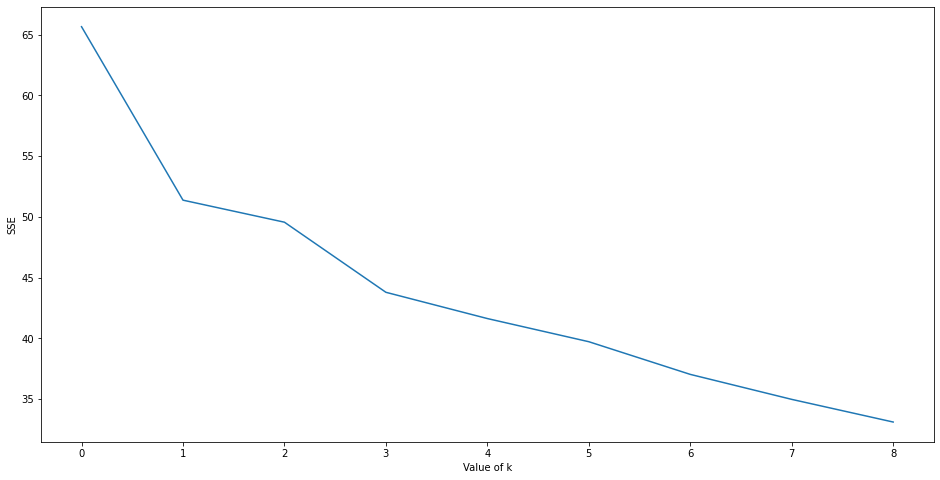

In [55]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
a=[]
for k in range(1,10):
    model = KMeans(n_clusters=k, init='k-means++', n_init=5)
    model.fit(pca_data)
    value = sum(np.min(cdist(pca_data, model.cluster_centers_, 'euclidean'),axis=1))/pca_data.shape[0]
    a.append(value)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(a)
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.show()
# model = KMeans(n_clusters=4, init='k-means++', n_init=5)
# y_pred = model.fit_predict(df.iloc[:,6:])